### What are the most demanded skills for the top 3 most popular data roles?
#### Methodology
1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Calculate skill percentage
4. Plot final findings

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_skills = df.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
1,Data Analyst,r
1,Data Analyst,python
1,Data Analyst,sql
1,Data Analyst,nosql
...,...,...
785739,"Principal Associate, Data Engineer (Remote-Eli...",kafka
785739,"Principal Associate, Data Engineer (Remote-Eli...",kubernetes
785739,"Principal Associate, Data Engineer (Remote-Eli...",docker
785740,AWS System Analyst,aws


In [3]:
# Group by job_skills and job_title_short and count the number of occurrences
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

# Name the count column as count
df_skills_count = df_skills_count.reset_index(name='skill_count')

# Sort the values by skill_count in descending order
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


#### Create List of Top 3 Roles

In [6]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

#### Plot Skill Counts

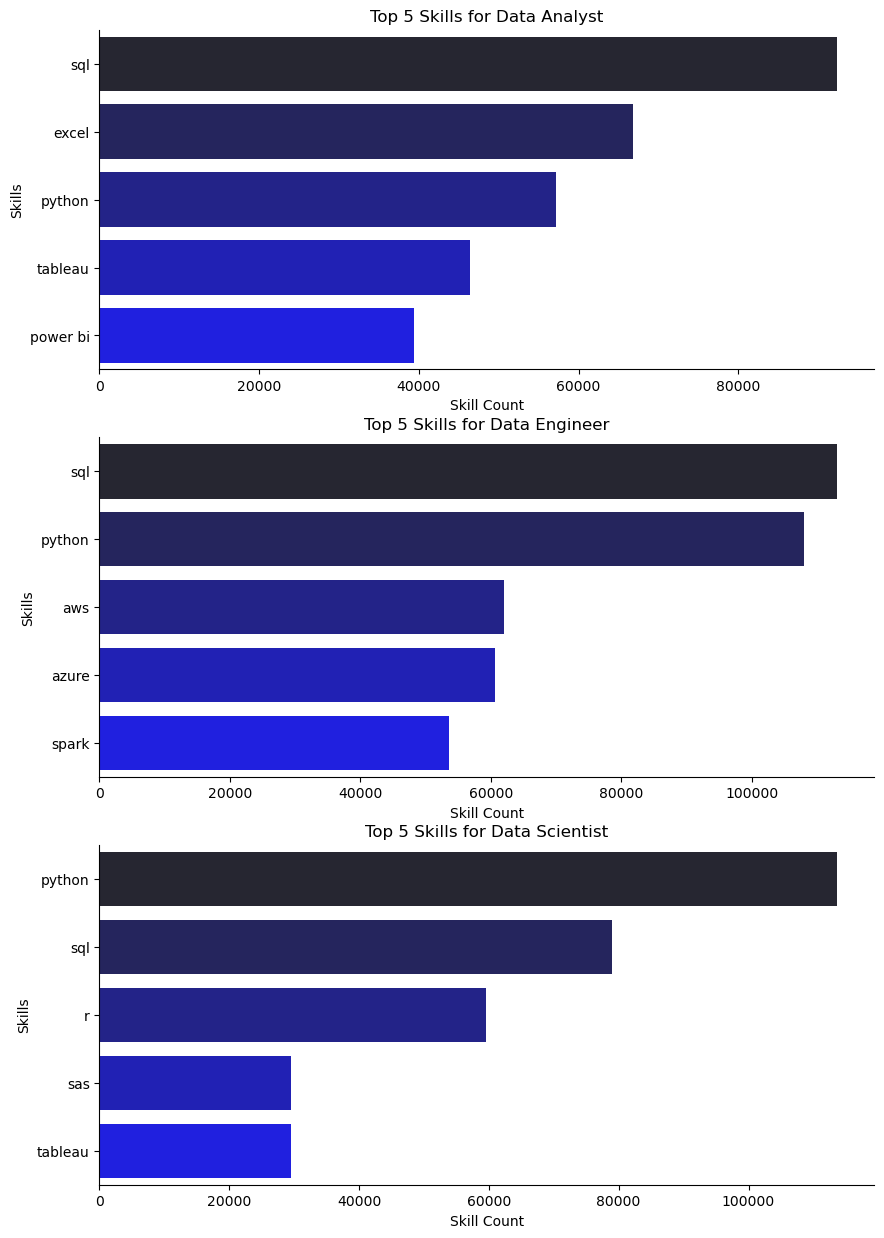

In [15]:
# Creating subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plotting for each job title
for ax, job_title in zip(axs, job_titles):
    # Filter DataFrame for the job title and get Top 5
    df_filtered = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    
    # Plotting
    sns.barplot(data=df_filtered, x='skill_count', y='job_skills', ax=ax, palette='dark:b')
    ax.set_title(f'Top 5 Skills for {job_title}')
    ax.set_xlabel('Skill Count')
    ax.set_ylabel('Skills')
    sns.despine(ax=ax)